In [83]:
import pandas as pd
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
import matplotlib.pyplot as plt
import graphviz
import re


In [84]:
df = pd.read_csv('../credit_risk_dataset.csv')
display(df)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [85]:
categorical_cols = ['person_home_ownership', 'loan_intent']
continuous_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
binary_col  = 'cb_person_default_on_file'

ordinal_col = 'loan_grade'
custom_order = ['A', 'B', 'C', 'D', 'E']

target = 'loan_status'

In [86]:
def one_hot_encode_variables(df, columns_to_encode):
    for column in columns_to_encode:
        if column in df.columns:
            one_hot_encoded = pd.get_dummies(df[column], prefix=column)
            df = pd.concat([df, one_hot_encoded], axis=1)
            df.drop(column, axis=1, inplace=True)
    return df

def binary_encode(df, columns_to_encode):
    mapping = {'Y': 1, 'N': 0}
    df[columns_to_encode] = df[columns_to_encode].map(mapping)
    return df

def ordinal_encode(df, columns_to_encode):
    mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}
    df[columns_to_encode] = df[columns_to_encode].map(mapping)
    return df

In [87]:
df = one_hot_encode_variables(df, categorical_cols)
df = binary_encode(df, binary_col)
df = ordinal_encode(df, ordinal_col)
display(df)

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,123.0,3.0,35000,16.02,1,0.59,1,3,False,False,False,True,False,False,False,False,True,False
1,21,9600,5.0,1.0,1000,11.14,0,0.10,0,2,False,False,True,False,False,True,False,False,False,False
2,25,9600,1.0,2.0,5500,12.87,1,0.57,0,3,True,False,False,False,False,False,False,True,False,False
3,23,65500,4.0,2.0,35000,15.23,1,0.53,0,2,False,False,False,True,False,False,False,True,False,False
4,24,54400,8.0,2.0,35000,14.27,1,0.55,1,4,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,2.0,5800,13.16,0,0.11,0,30,True,False,False,False,False,False,False,False,True,False
32577,54,120000,4.0,0.0,17625,7.49,0,0.15,0,19,True,False,False,False,False,False,False,False,True,False
32578,65,76000,3.0,1.0,35000,10.99,1,0.46,0,28,False,False,False,True,False,False,True,False,False,False
32579,56,150000,5.0,1.0,15000,11.48,0,0.10,0,26,True,False,False,False,False,False,False,False,True,False


In [88]:
random.seed(42)
train_df,test_df = train_test_split(df, test_size=0.25)

In [89]:
train_x = train_df.drop(target, axis=1)
train_y = train_df[target]

m = DecisionTreeClassifier(max_leaf_nodes=4).fit(train_x, train_y)

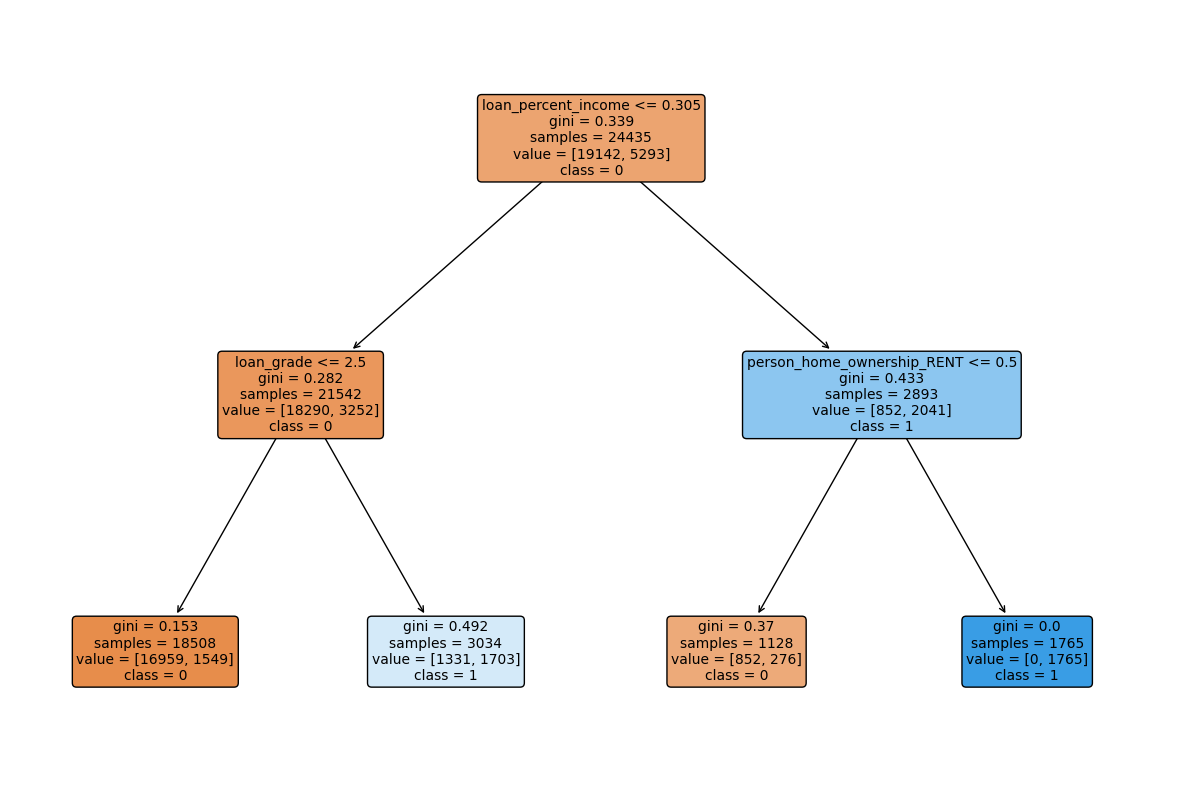

In [90]:
plt.figure(figsize=(15, 10))
plot_tree(m, filled=True, feature_names=train_x.columns, class_names=[str(i) for i in m.classes_], rounded=True, fontsize=10)
plt.show()